In [ ]:
# Сравнение времени выполнения “наивного” скалярного произведения векторов с реализацией в NumPy
import numpy as np
import itertools
import pandas as pd
import torch


# Создание одномернового массива
def create_bool_array(n):
    return np.random.randint(0, 2, size = n, dtype=int)


# Функция подсчёта времени выполнения функции (декоратор)
def time_decorator(function):
    import time

    def wrapper(v1, v2):
      start_time = time.time()
      result = function(v1, v2)
      time_dec = time.time() - start_time
      return time_dec
    return wrapper


# Наивная функция
@time_decorator
def naive(vector1, vector2):
    return sum(vector1*vector2)


# Numpy функция
@time_decorator
def dot_numpy(vector1, vector2):
    return np.dot(vector1, vector2)

# PyTorch функция
@time_decorator
def dot_torch(vector1, vector2):
    return torch.dot(torch.tensor(vector1), torch.tensor(vector2))

In [ ]:
'''Создание рандомных boolean массивов необходимой длинны'''
# В len_array хранятся размерности массивов
len_array = [1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
ran_arr1, ran_arr2 = [], [] # В ran_arr* будут хранится непосредственно массивы
random_array = [ran_arr1, ran_arr2]

# Создаём boolean массивы необходимой длинны
for arr in random_array:
    for len_a in len_array:
        arr.append(create_bool_array(len_a))

In [ ]:
'''Подсчёт времени выполнения функций'''
df = pd.DataFrame({'len': len_array})

lead_time_naive = []
lead_time_numpy = []
lead_time_torch = []

for i in range(len(ran_arr1)):
    lead_time_naive.append(naive(ran_arr1[i], ran_arr2[i]))

for i in range(len(ran_arr1)):
    lead_time_numpy.append(dot_numpy(ran_arr1[i], ran_arr2[i]))

for i in range(len(ran_arr1)):
    lead_time_torch.append(dot_torch(ran_arr1[i], ran_arr2[i]))

print(lead_time_naive)
print(lead_time_numpy)
print(lead_time_torch)

df['naive'] = lead_time_naive
df['numpy'] = lead_time_numpy
df['torch'] = lead_time_torch

[4.38690185546875e-05, 3.5762786865234375e-06, 5.9604644775390625e-06, 4.3392181396484375e-05, 0.0001697540283203125, 0.0018982887268066406, 0.021252155303955078, 0.19612812995910645, 1.7491137981414795]
[0.00013566017150878906, 3.337860107421875e-06, 2.384185791015625e-06, 2.384185791015625e-06, 3.5762786865234375e-06, 2.09808349609375e-05, 0.00017523765563964844, 0.0016901493072509766, 0.01636481285095215]
[0.0012080669403076172, 2.1457672119140625e-05, 1.7881393432617188e-05, 7.081031799316406e-05, 2.47955322265625e-05, 0.0004324913024902344, 0.0014643669128417969, 0.006102561950683594, 0.055361032485961914]


Text(10, 5e-06, 'numpy')

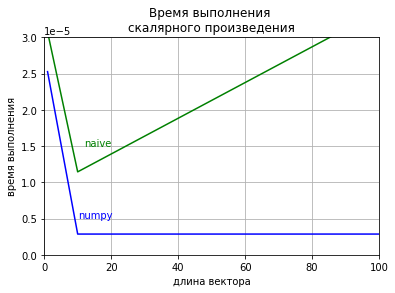

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlim([0, 100])
ax.set_ylim([0, 0.00003])
ax.set_title('Время выполнения \nскалярного произведения')
ax.set_xlabel('длина вектора')
ax.set_ylabel('время выполнения')

x = df['len']
y = df['naive']
y1 = df['numpy']
y2 = df['torch']

ax.grid(True)
ax.plot(x, y, 'g')
ax.text(12, 0.000015, u'naive', color = 'g')
ax.plot(x, y1, 'b')
ax.text(10, 0.000005, u'numpy', color = 'b')
#ax.plot(x, y2, 'r')
#ax.text(0, 0.25, u'torch', color = 'r')

Text(0, 0.04, 'torch')

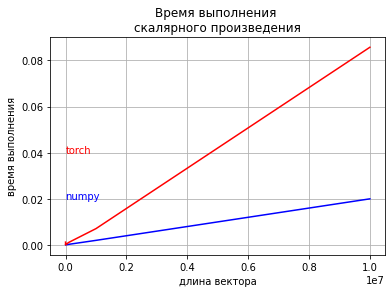

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('Время выполнения \nскалярного произведения')
ax.set_xlabel('длина вектора')
ax.set_ylabel('время выполнения')

x = df['len']
y1 = df['numpy']
y2 = df['torch']

ax.grid(True)

ax.plot(x, y1, 'b')
ax.text(0, 0.02, u'numpy', color = 'b')
ax.plot(x, y2, 'r')
ax.text(0, 0.04, u'torch', color = 'r')